In [1]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm # progress bar
import random
import os
from sklearn.model_selection import train_test_split
import datetime
import glob
from sklearn.utils import shuffle

In [2]:
# import image processing libraries
import cv2
import skimage
from skimage.transform import resize
from IPython.display import Image

In [3]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [4]:
# tensorboard path
path = r"C:\Users\tasos\Desktop\tensorboard\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

In [5]:
# load data
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29
train_len = 87000
train_dir = 'C:/Users/tasos/Desktop/deepml/input/asl_alphabet_train/asl_alphabet_train/'
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

C:\Users\tasos\anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


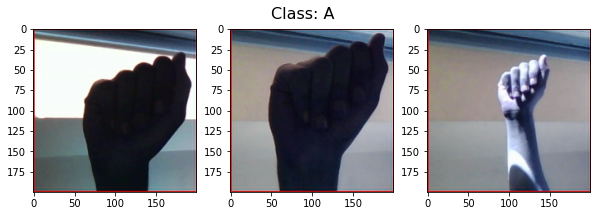

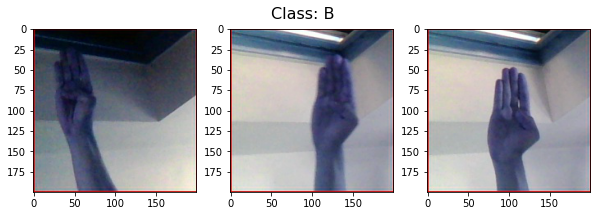

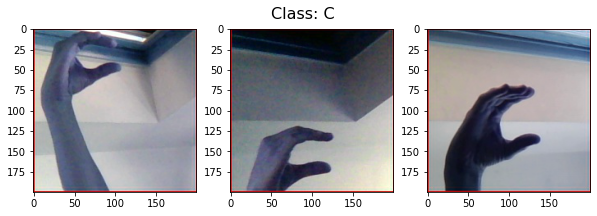

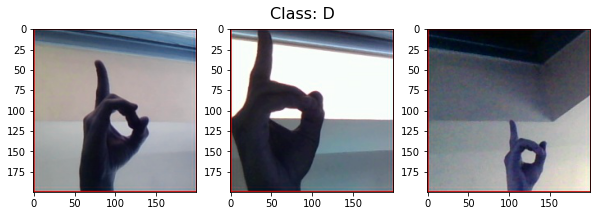

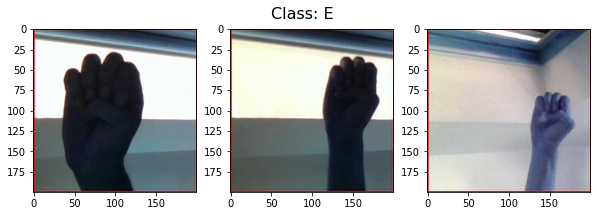

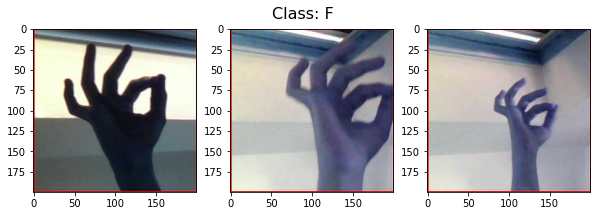

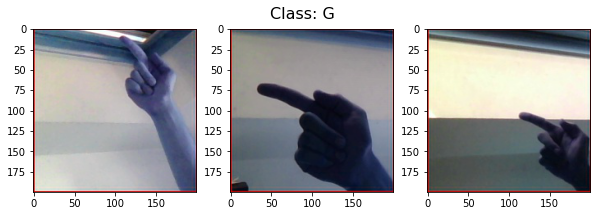

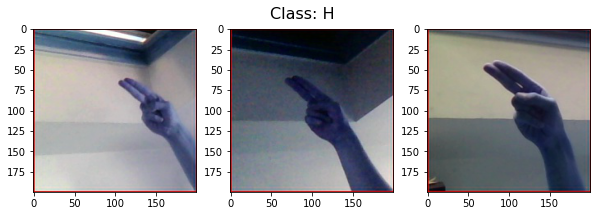

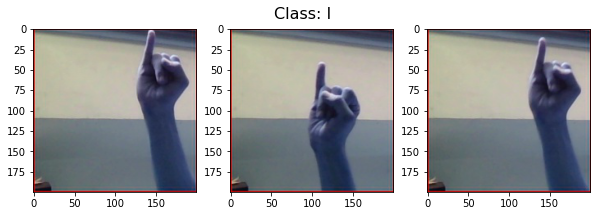

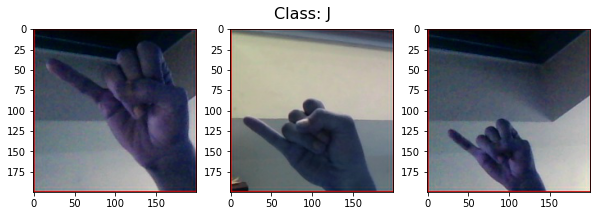

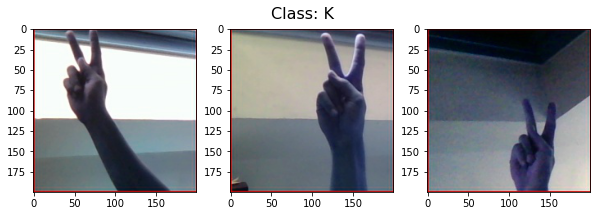

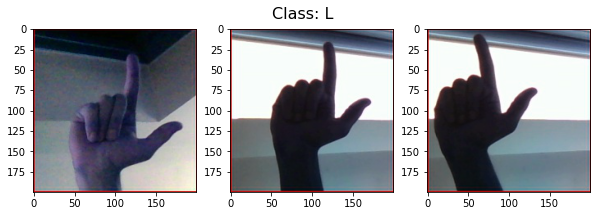

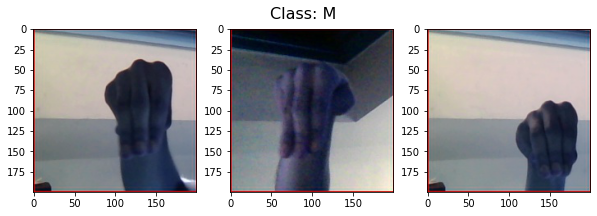

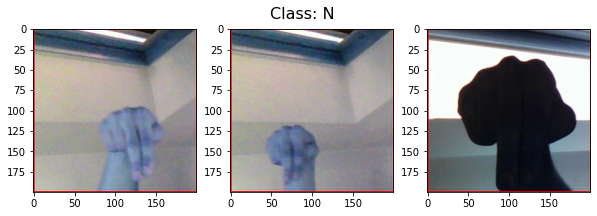

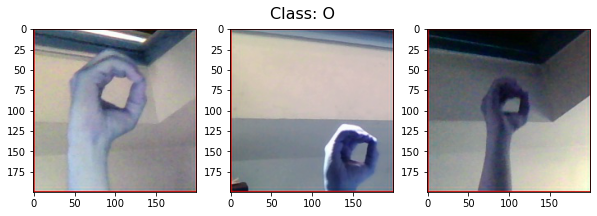

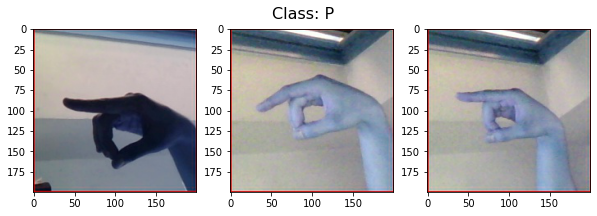

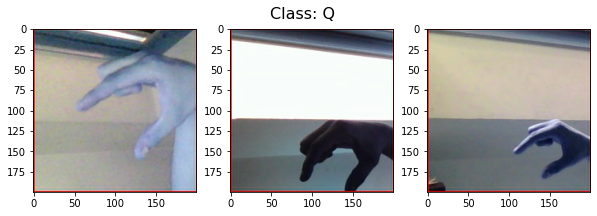

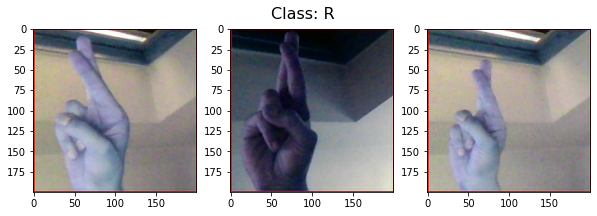

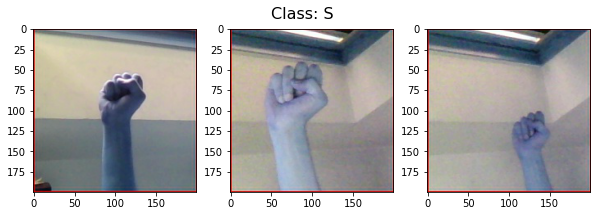

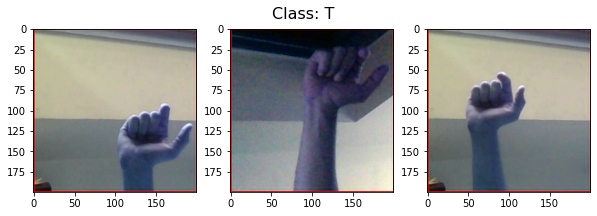

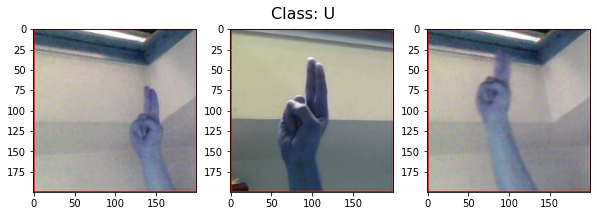

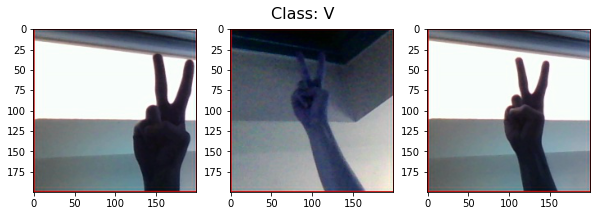

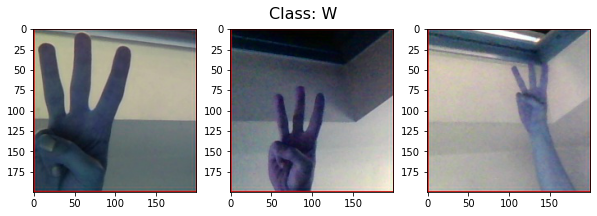

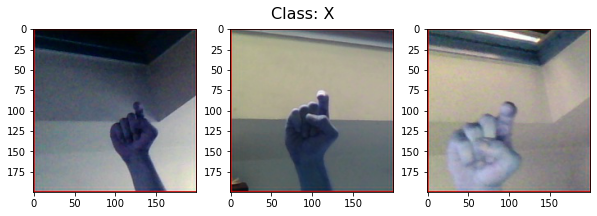

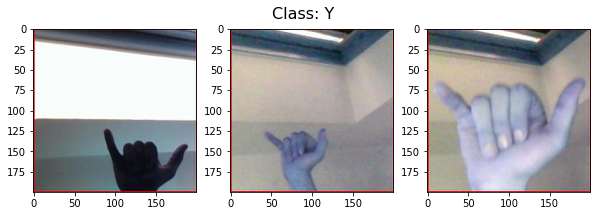

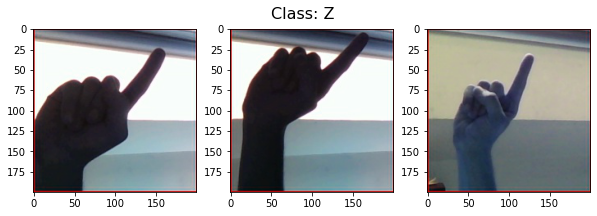

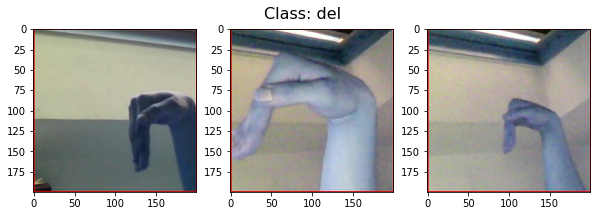

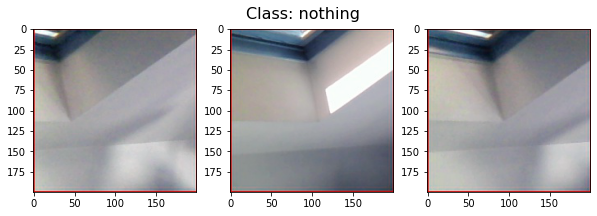

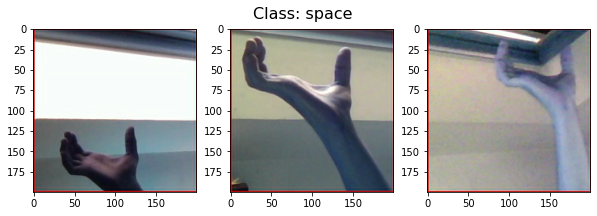

In [6]:
# print 3 random images from each class in order to show dataset's shape, background etc
def plotThreeImages(images, path, className):
    r = random.sample(images, 3)
    plt.figure(figsize=(10,3))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2]))
    plt.suptitle('Class: {}'.format(className), fontsize=16)


for i in range(len(class_names)):    
    multipleImages = glob.glob(train_dir +'/{}/**.jpg'.format(class_names[i]))
    multiple_path = glob.glob(train_dir +'/{}/**.jpg'.format(class_names[i]))
    plotThreeImages(multipleImages, path, class_names[i])

In [7]:
#get x_train and y_train
def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            for i in range(num_classes):
                if folderName in class_names[i]:
                    label = i
                    print(folderName, class_names[i], i)
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y        

X_train, y_train = get_data(train_dir)

C:\Users\tasos\anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
  2%|▏         | 46/3000 [00:00<00:12, 230.70it/s]

A A 0


  2%|▏         | 56/3000 [00:00<00:10, 276.08it/s]

B B 1


  1%|          | 28/3000 [00:00<00:10, 278.52it/s]

C C 2


  1%|          | 26/3000 [00:00<00:11, 253.43it/s]

D D 3


  2%|▏         | 54/3000 [00:00<00:11, 265.10it/s]

del del 26


  1%|          | 27/3000 [00:00<00:11, 264.65it/s]

E E 4


  1%|          | 27/3000 [00:00<00:11, 262.08it/s]

F F 5


  1%|          | 29/3000 [00:00<00:10, 282.12it/s]

G G 6


  1%|          | 28/3000 [00:00<00:10, 273.49it/s]

H H 7


  1%|          | 28/3000 [00:00<00:10, 279.04it/s]

I I 8


  2%|▏         | 55/3000 [00:00<00:10, 271.04it/s]

J J 9


  1%|          | 28/3000 [00:00<00:10, 271.54it/s]

K K 10


  1%|          | 27/3000 [00:00<00:11, 267.27it/s]

L L 11


  1%|          | 27/3000 [00:00<00:11, 264.65it/s]

M M 12


  1%|          | 28/3000 [00:00<00:10, 277.06it/s]

N N 13


  1%|          | 28/3000 [00:00<00:10, 275.18it/s]

nothing nothing 27


  1%|          | 29/3000 [00:00<00:10, 286.90it/s]

O O 14


  1%|          | 31/3000 [00:00<00:09, 301.42it/s]

P P 15


  1%|          | 28/3000 [00:00<00:10, 272.64it/s]

Q Q 16


  1%|          | 27/3000 [00:00<00:11, 265.90it/s]

R R 17


  1%|          | 29/3000 [00:00<00:10, 280.45it/s]

S S 18


  1%|          | 28/3000 [00:00<00:10, 274.51it/s]

space space 28


  2%|▏         | 56/3000 [00:00<00:10, 277.66it/s]

T T 19


  1%|          | 27/3000 [00:00<00:11, 265.44it/s]

U U 20


  1%|          | 28/3000 [00:00<00:10, 274.50it/s]

V V 21


  2%|▏         | 56/3000 [00:00<00:11, 266.44it/s]

W W 22


  2%|▏         | 55/3000 [00:00<00:10, 272.72it/s]

X X 23


  1%|          | 26/3000 [00:00<00:11, 258.63it/s]

Y Y 24


  1%|          | 27/3000 [00:00<00:11, 269.94it/s]

Z Z 25


100%|██████████| 3000/3000 [00:10<00:00, 277.05it/s]


In [8]:
print(X_train.shape)
print(y_train.shape)

(87000, 64, 64, 3)
(87000,)


In [9]:
#show random train images' shape. they all have the shame shape after preprocessing
for i in range(0, train_len, 3000):
    print("The shape of one image is : ", X_train[i].shape)

The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one image is :  (64, 64, 3)
The shape of one

In [10]:
#split the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [11]:
#One-Hot-Encode the categorical data
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [12]:
#check the dimensions of all variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(69600, 64, 64, 3)
(69600,)
(17400, 64, 64, 3)
(17400,)
(69600, 29)
(17400, 29)


In [13]:
#shuffle data for independent training
X_train, y_cat_train = shuffle(X_train, y_cat_train, random_state=13)
X_test, y_cat_test = shuffle(X_test, y_cat_test, random_state=13)

In [14]:
#map categorical labels to actual classes
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H',
                  8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O',
                  15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V',
                  22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}

dict_characters=map_characters
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
print(dict_characters)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}


C:\Users\tasos\anaconda3\envs\deep\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='labels', ylabel='count'>

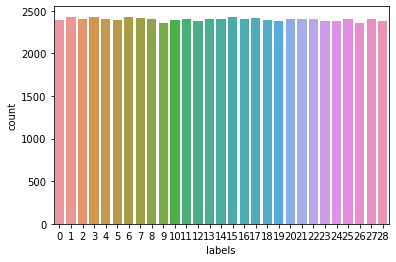

In [15]:
#print counts of every label. we observe that our training dataset is balanced.
sns.countplot(lab)

C:\Users\tasos\anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


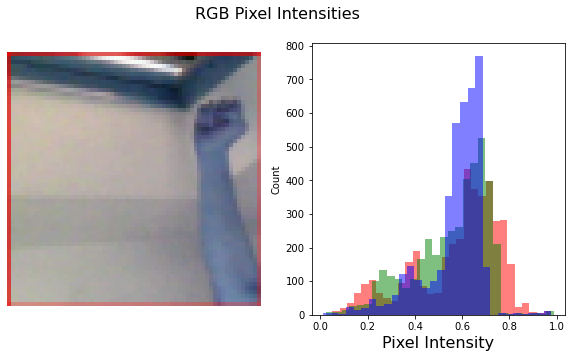

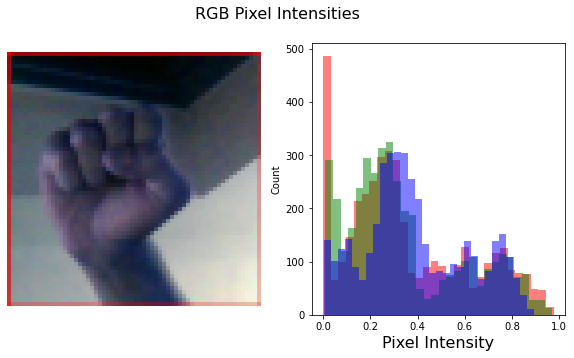

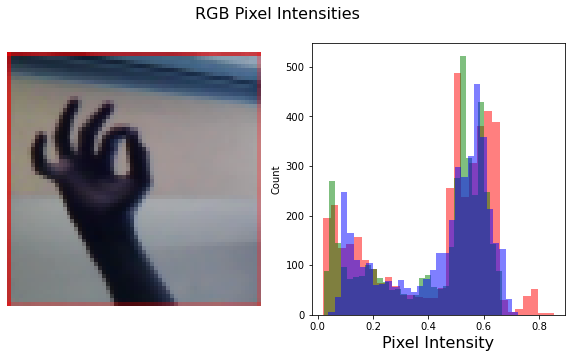

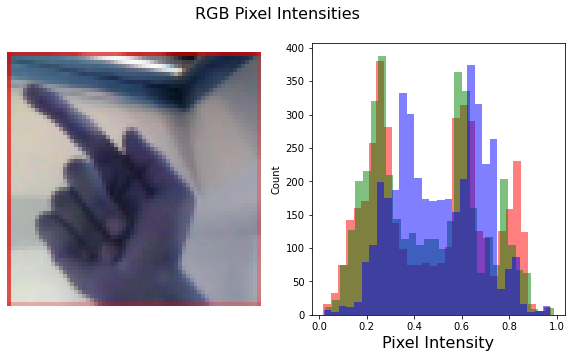

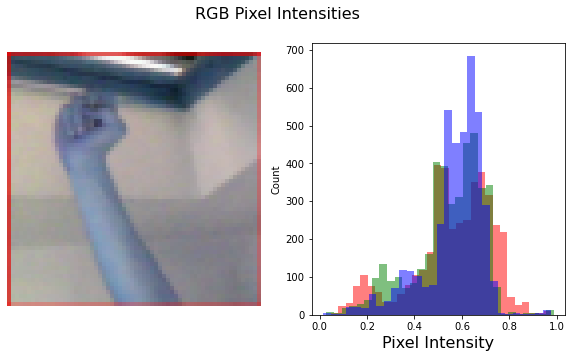

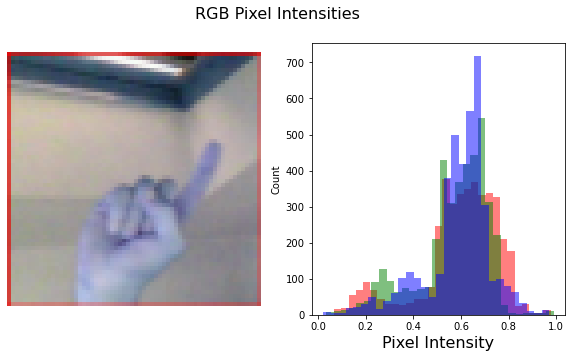

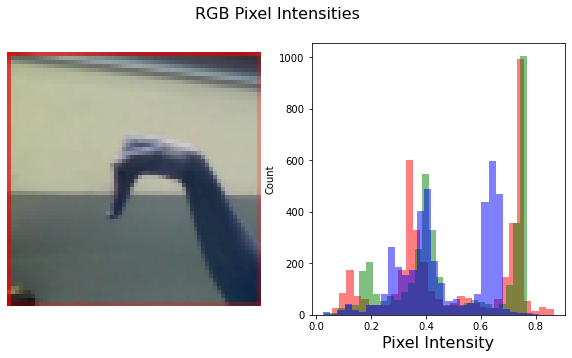

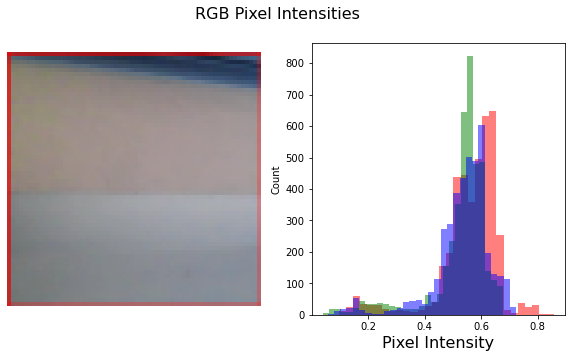

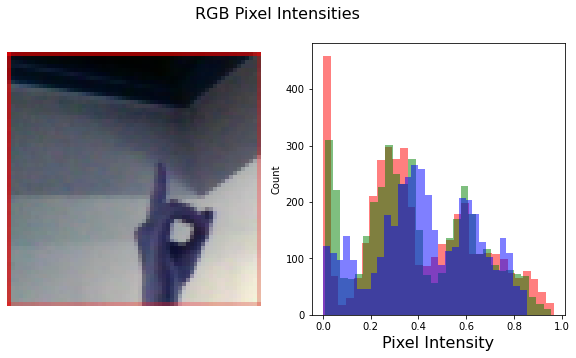

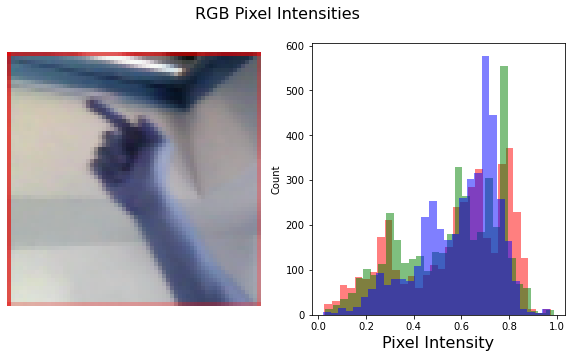

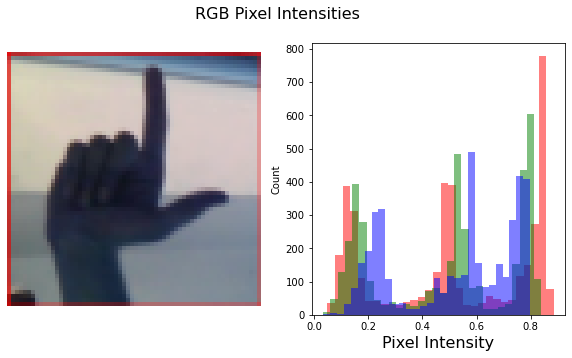

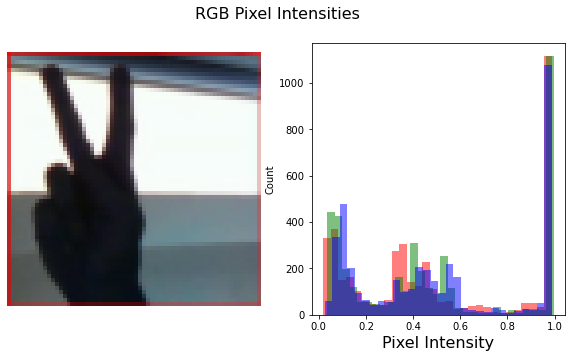

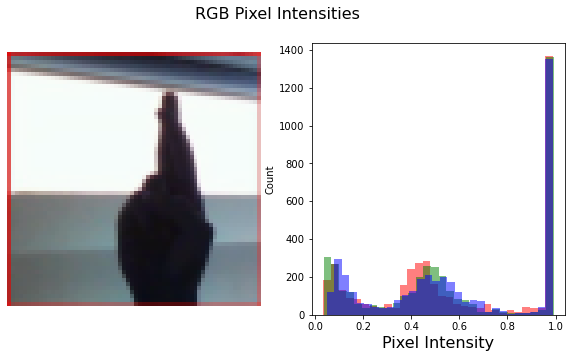

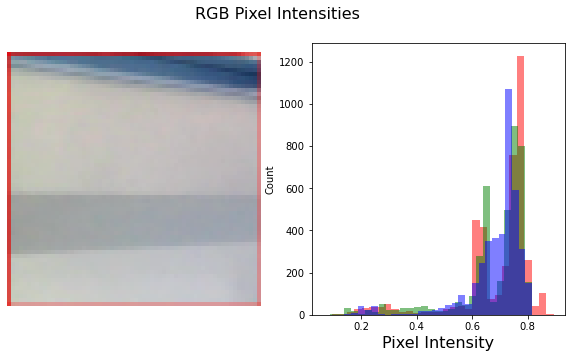

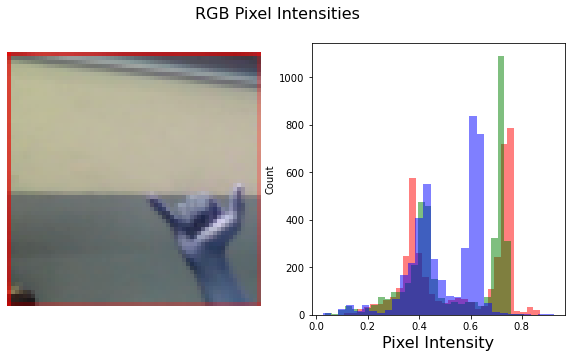

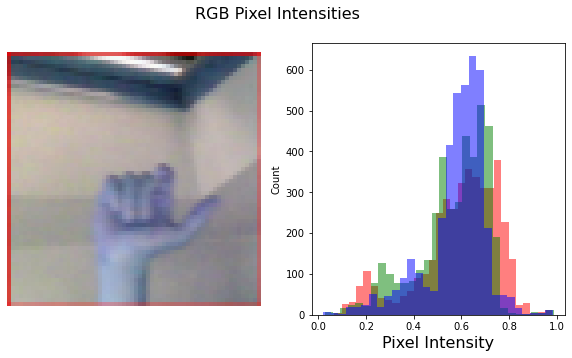

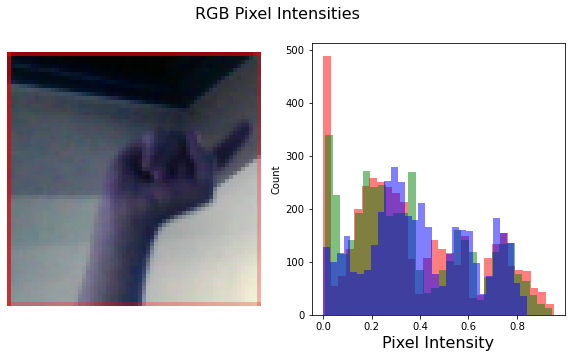

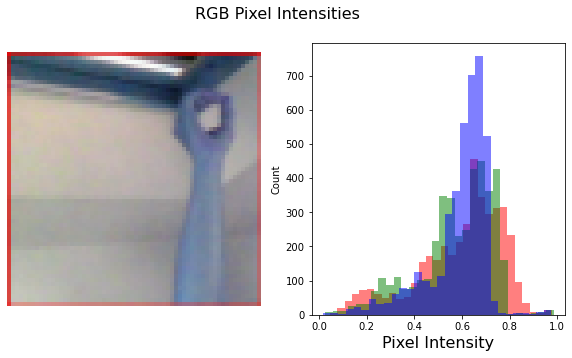

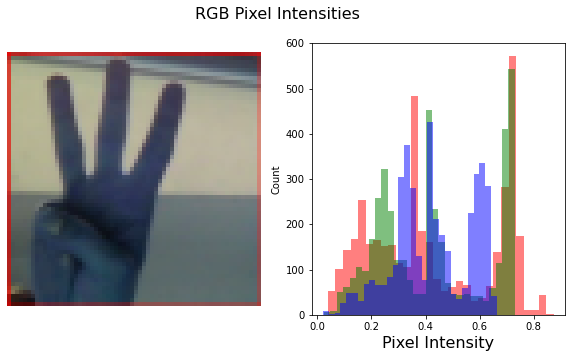

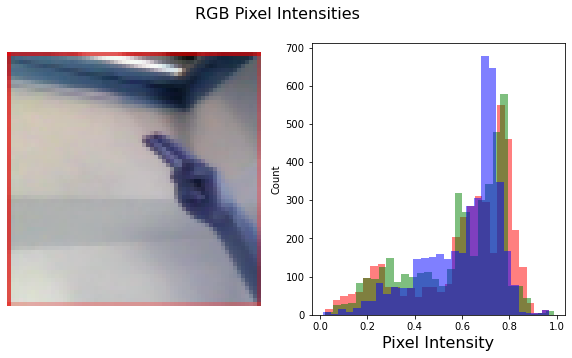

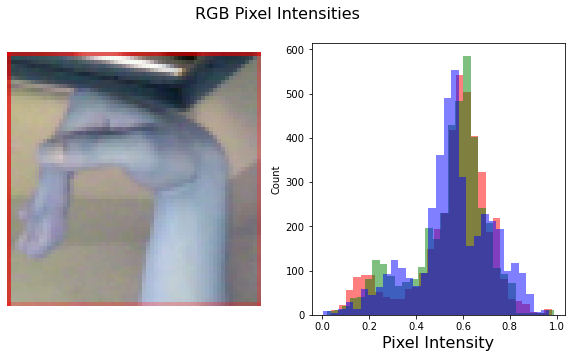

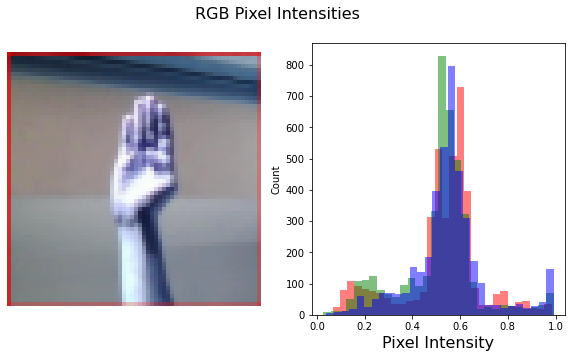

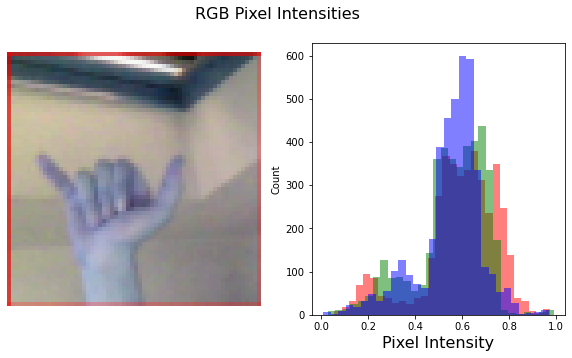

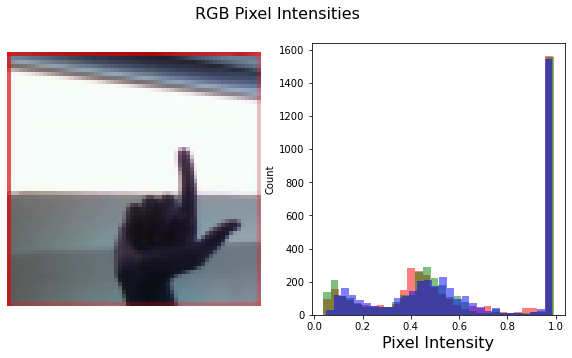

In [16]:
#plot histogram of RGB Pixel Intensities for random images of training dataset
def plotHistogram(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity', fontsize=16)
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
    plt.suptitle("RGB Pixel Intensities", fontsize=16)

for i in range(0, 69600, 3000):
    plotHistogram(X_train[i])

In [17]:
'''
Early Stopping is done to make sure the model fitting stops at the most 
optimized accuracy point. After the early stopping point, the model might start overfitting.
'''

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [18]:
# f1 score to use in order to evaluate the model
f1 = tfa.metrics.F1Score(num_classes=29, threshold=0.5, average = 'macro')


In [19]:
input_shape = (imageSize,imageSize,3)

model = tf.keras.models.Sequential([
        
        tf.keras.layers.Conv2D(filters = 32,
                                kernel_size = 3, 
                                activation='relu',
                                input_shape=input_shape),
    
        
    
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
    
        tf.keras.layers.Conv2D(filters= 64,
                                kernel_size = 3,
                                activation='relu'),
    
        
    
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),
        
        tf.keras.layers.Conv2D(filters= 128,
                                kernel_size = 3,
                                activation='relu'),
            
    
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'),       
    
        tf.keras.layers.Flatten(),

        tf.keras.layers.Dropout(0.25),

    
        tf.keras.layers.Dense(29,activation='softmax')
        ])
 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',f1])

model_fit = model.fit(X_train, y_cat_train, epochs=20, batch_size=64,
                        verbose=1, validation_data=(X_test, y_cat_test),
                        callbacks=[early_stop,tensorboard_callback])

Train on 69600 samples, validate on 17400 samples
Epoch 1/20
69600/69600 [==============================] - 127s 2ms/sample - loss: 1.0381 - accuracy: 0.6926 - f1_score: 0.7108 - val_loss: 0.2414 - val_accuracy: 0.9229 - val_f1_score: 0.9205
Epoch 2/20
69600/69600 [==============================] - 127s 2ms/sample - loss: 0.1690 - accuracy: 0.9462 - f1_score: 0.9451 - val_loss: 0.1054 - val_accuracy: 0.9681 - val_f1_score: 0.9673
Epoch 3/20
69600/69600 [==============================] - 123s 2ms/sample - loss: 0.0846 - accuracy: 0.9721 - f1_score: 0.9723 - val_loss: 0.0406 - val_accuracy: 0.9879 - val_f1_score: 0.9879
Epoch 4/20
69600/69600 [==============================] - 122s 2ms/sample - loss: 0.0621 - accuracy: 0.9798 - f1_score: 0.9797 - val_loss: 0.0299 - val_accuracy: 0.9929 - val_f1_score: 0.9929
Epoch 5/20
69600/69600 [==============================] - 123s 2ms/sample - loss: 0.0454 - accuracy: 0.9850 - f1_score: 0.9850 - val_loss: 0.0286 - val_accuracy: 0.9907 - val_f1_scor

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0

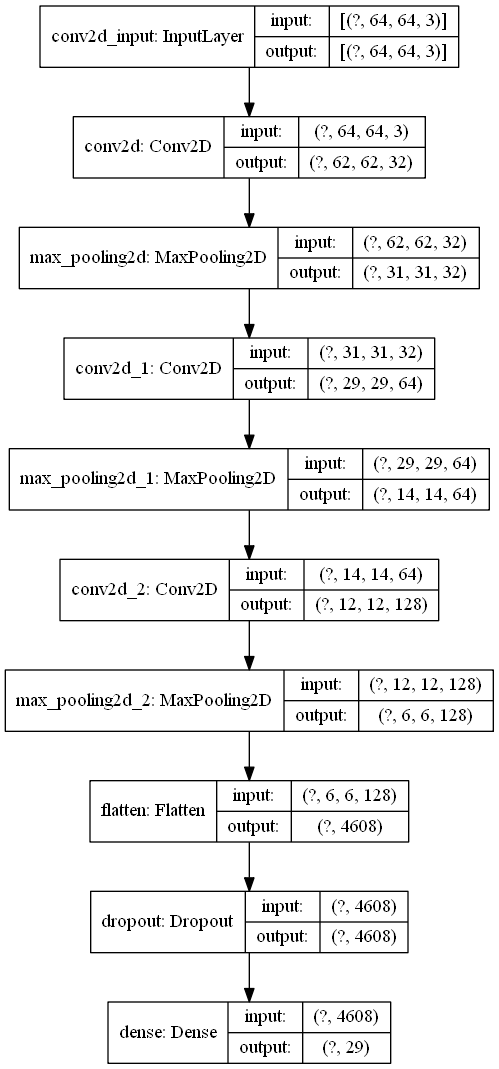

In [21]:
#plot cnn model graph tree
plot_model(model, to_file='plot_model.png', show_shapes=True)
Image(filename='plot_model.png')

In [22]:
# Test model with random image found online
from PIL import Image
from tensorflow.keras.preprocessing import image

x = Image.open('C:/Users/tasos/Desktop/deepml/input/asl_alphabet_test/asl_alphabet_test/O_test.jpg')
X = x.resize((imageSize,imageSize),Image.ANTIALIAS)
X = image.img_to_array(X)
X = np.expand_dims(X,axis=0)
val = model.predict(X)

#print(val)
new_val = [np.where(r==1)[0][0] for r in val]
#print(new_val)
predicted_value = new_val[0]
print(predicted_value)
print("Prediction is: " + map_characters[predicted_value])

14
Prediction is: O
